# Project_8_Twitter US Airline Sentiment

In [341]:
#Student Name : Makarand More

In [399]:
# Task # 1 : Import the libraries, load dataset, print shape of data, data description
import re, string, unicodedata
import nltk           
from bs4 import BeautifulSoup  
import contractions
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [400]:
# Load dataset.
DS_Tweet = pd.read_csv('Tweets.csv')

In [401]:
# Chect first 5 rows of data.
DS_Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [402]:
#Note:  Notice how there exist special characters like @, #, !, and etc. We will remove these characters later in the data cleaning step.

In [403]:
DS_Tweet.shape

(14640, 15)

In [404]:
#Check In case of  NULL values.
DS_Tweet.isnull().sum(axis=0)        

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [405]:
#counting the number of tweets each airlines has received
DS_Tweet.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [406]:
#counting the number of each type of sentiments
DS_Tweet.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [407]:
DS_Tweet.describe() #.transpose()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


Text(0, 0.5, 'No. of Tweets')

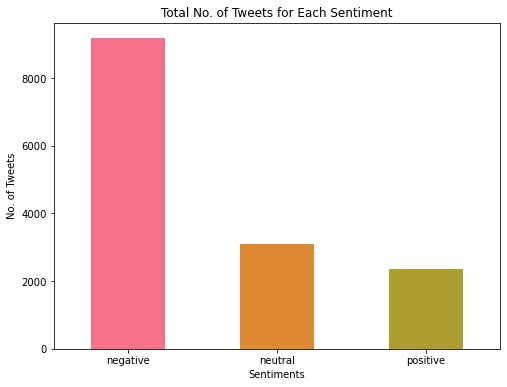

In [408]:
colors=sns.color_palette("husl", 10)
pd.Series(DS_Tweet["airline_sentiment"]).value_counts().plot(kind = "bar",
color=colors,figsize=(8,6),rot=0, title = "Total No. of Tweets for Each Sentiment")
plt.xlabel('Sentiments', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

<AxesSubplot:title={'center':'Total Tweets for Each Sentiment'}, ylabel='airline_sentiment'>

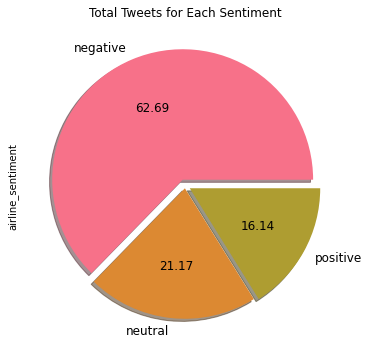

In [409]:
colors=sns.color_palette("husl", 10)
pd.Series(DS_Tweet["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],
shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

In [410]:
#Task#2: Understand of data-columns
#Drop all other columns except “text” and “airline_sentiment”.
DS_Tweet_1 = DS_Tweet.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'], axis=1)

In [411]:
#Check the shape of data.
DS_Tweet_1.shape

(14640, 2)

In [412]:
#Print first 5 rows of data.
pd.set_option('display.max_colwidth', None)
DS_Tweet_1.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [413]:
from sklearn.preprocessing import LabelEncoder # This would help on pre-processing and model evalute, and would improve performance
le = LabelEncoder()
DS_Tweet_1.airline_sentiment= le.fit_transform(DS_Tweet_1.airline_sentiment.values)

In [414]:
DS_Tweet_1.head(5)

,airline_sentiment,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials to the experience... tacky.
2,1,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,0,@VirginAmerica and it's a really big bad thing about it


<AxesSubplot:title={'center':'Total Tweets for Each Sentiment'}, ylabel='airline_sentiment'>

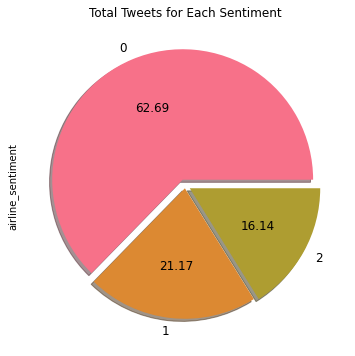

In [415]:
colors=sns.color_palette("husl", 10)
pd.Series(DS_Tweet_1["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
labels=["0", "1", "2"],explode=[0.05,0.02,0.04],
shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

In [416]:
#Task 3: Text pre-processing: Data preparation.
#Html tag removal.
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")    # Removing HTML tags
    return soup.get_text()

pd.set_option('display.max_colwidth', None)

#for i, row in DS_Tweet_1.iterrows(): 
 #   clean_text = strip_html(DS_Tweet_1.at[i, 'text'])
  #  DS_Tweet_1.at[i,'text'] = clean_text
#DS_Tweet_1.head(5)

#alternative way - using lambda 
DS_Tweet_1['text'] = DS_Tweet_1['text'].apply(lambda x: strip_html(x))
DS_Tweet_1.head(5)

,airline_sentiment,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials to the experience... tacky.
2,1,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,0,@VirginAmerica and it's a really big bad thing about it


In [417]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the above operation over all the rows of text column of the dataframe.
#for i, row in DS_Tweet_1.iterrows():
 #   text = DS_Tweet_1.at[i, 'text']
 #   clean_text = replace_contractions(text)
 #   DS_Tweet_1.at[i,'text'] = clean_text
#DS_Tweet_1.head(5)

#alternative way - using lambda 
DS_Tweet_1['text'] = DS_Tweet_1['text'].apply(lambda x: replace_contractions(x))
DS_Tweet_1.head(5)

,airline_sentiment,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you have added commercials to the experience... tacky.
2,1,@VirginAmerica I did not today... Must mean I need to take another trip!
3,0,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,0,@VirginAmerica and it is a really big bad thing about it


In [418]:
#Remove the numbers.
#def remove_number(words):
 #   """Remove number from list of tokenized words"""
 #   new_words = []                        # Create empty list to store pre-processed words.
 #   for word in words:
 #       new_word = re.sub(r'\d', '', word)
 #       if new_word != '':
 #           new_words.append(new_word)    # Append processed words to new list.
 #   return new_words
    
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

DS_Tweet_1['text'] = DS_Tweet_1['text'].apply(lambda x: remove_numbers(x))
DS_Tweet_1.head(5)

,airline_sentiment,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you have added commercials to the experience... tacky.
2,1,@VirginAmerica I did not today... Must mean I need to take another trip!
3,0,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,0,@VirginAmerica and it is a really big bad thing about it


In [419]:
#Tokenization.
# Tokenize the words of whole dataframe.
#for i, row in DS_Tweet_1.iterrows():
 #   text = DS_Tweet_1.at[i, 'text']
 #  words = nltk.word_tokenize(text)
 #   DS_Tweet_1.at[i,'text'] = words

#alternative way - using lambda 
DS_Tweet_1['text'] = DS_Tweet_1.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

DS_Tweet_1.head(10)


,airline_sentiment,text
0,1,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,2,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,1,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,0,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,0,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
5,0,"[@, VirginAmerica, seriously, would, pay, $, a, flight, for, seats, that, did, not, have, this, playing, ., it, is, really, the, only, bad, thing, about, flying, VA]"
6,2,"[@, VirginAmerica, yes, ,, nearly, every, time, I, fly, VX, this, “, ear, worm, ”, will, not, go, away, :, )]"
7,1,"[@, VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, ,, there, ., https, :, //t.co/mWpGgrEZP]"
8,2,"[@, virginamerica, Well, ,, I, did, not…but, NOW, I, DO, !, :, -D]"
9,2,"[@, VirginAmerica, it, was, amazing, ,, and, arrived, an, hour, early, ., you, are, too, good, to, me, .]"


In [420]:
pd.set_option('display.max_colwidth', None) # It will enable the entire row visible with truncation of the text. (We can see full text.)
DS_Tweet_1.loc[[5]]

,airline_sentiment,text
5,0,"[@, VirginAmerica, seriously, would, pay, $, a, flight, for, seats, that, did, not, have, this, playing, ., it, is, really, the, only, bad, thing, about, flying, VA]"


In [421]:
lemmatizer = WordNetLemmatizer()

def remove_special_characters(words):
    """Remove special Char from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^A-Za-z0-9]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

#def remove_stopwords(words):
 #   """Remove stop words from list of tokenized words"""
 #   new_words = []
 #   for word in words:
 #      if word not in stopwords:
  #          new_words.append(word)
  #  return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_special_characters(words)
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
   # words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words) #Join the words in the list 


DS_Tweet_1['text'] = DS_Tweet_1.apply(lambda row: normalize(row['text']), axis=1)
DS_Tweet_1.head(5) #Print first 5 rows of data after pre-processing

,airline_sentiment,text
0,1,virginamerica what dhepburn say
1,2,virginamerica plus you have add commercials to the experience tacky
2,1,virginamerica i do not today must mean i need to take another trip
3,0,virginamerica it be really aggressive to blast obnoxious entertainment in your guests face they have little recourse
4,0,virginamerica and it be a really big bad thing about it


In [422]:
#Task 4 : Vectorization (Convert text data to numbers)
#Task 5 # Fit and evaluate model using both type of vectorization. 

#1st using CountVectorizer :
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()             # Tried various options analyzer="word" and Keep only 1500 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(DS_Tweet_1['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [423]:
data_features.shape

(14640, 12102)

In [424]:
data_features[5]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [425]:
labels = DS_Tweet_1['airline_sentiment']
labels = labels.astype('int')

In [426]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [427]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7207650273224044


In [428]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

In [429]:
print("Training Accuracy :", forest.score(X_train, y_train))
print("Test Accuracy :", forest.score(X_test, y_test))


Training Accuracy : 0.9838992974238876
Test Accuracy : 0.7584244080145719


[[2657  122   35]
 [ 473  359   52]
 [ 276  103  315]]


<AxesSubplot:>

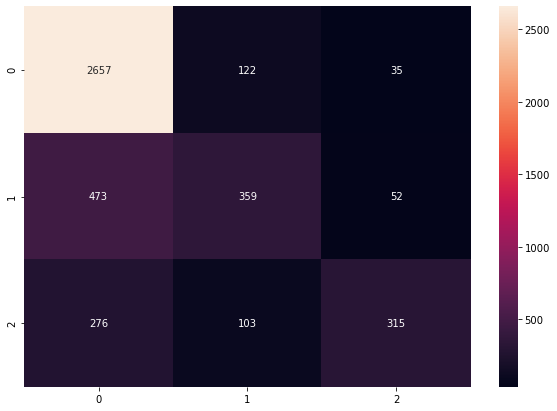

In [430]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [431]:
#2nd using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() #max_features=1500
data_features = vectorizer.fit_transform(DS_Tweet_1['text'])

data_features = data_features.toarray()
data_features.shape

(14640, 12102)

In [432]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7119535519125681


In [433]:
result = forest.predict(X_test)

In [434]:
print("Training Accuracy :", forest.score(X_train, y_train))
print("Test Accuracy :", forest.score(X_test, y_test))

Training Accuracy : 0.9838992974238876
Test Accuracy : 0.7609289617486339


<AxesSubplot:>

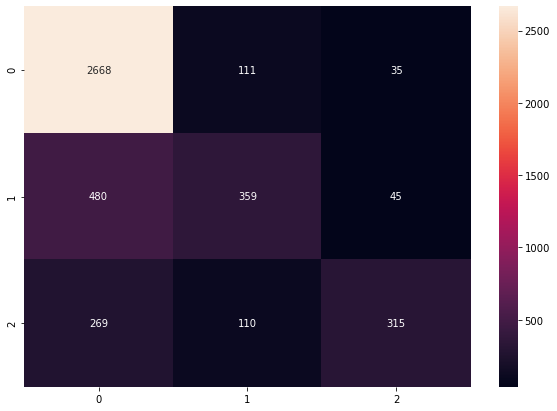

In [435]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [436]:
#Summary:
#1. The dataset of total volume of 15K is used as Tweet in text formart to classify positive, negative, and neutral tweets
#2. Basic EDA activities are performed in order check for Null values and volume of different classification. In overall data 
# more then 60% data classify for negative sentiment.
#3. Various pre-precessed technciques are followed to have clean dataset for modeling
#4. In pre-precessed peformed HTMLtag removal using BeautifulSoup, tried using both for loop and lambda expersion. Post HTML 
# tag removal contraction and removed number from Tweet (Text) as those are not provding insight. 
#5. In pre-precessed also performed special character and punctuations removal after Tokenization of data. 
#6.The pre-precessed data is converted to numbers using two Vectorization technique ,so that we can feed the data in the model.
#CountVectorizer provided a simple way to both tokenize a collection of text documents and build a vocabulary of known words.
#7. Explore the model performance with or without stopwords and dont much difference in model performance.
#8. Ovrall model performed good in perspective of how the text classification models perform
#9. One more way to increase accuracy is to use different variations of Pre-processing techniques and also try to explore further
# with different technique and hyperparamter tunning.
    

In [437]:
#Student Name : Makarand More